## Step by step procedure to implement bank task

# 1. Understand the Goal

- **We want to predict whether a customer will subscribe to a term deposit (`y` column in the dataset), based on demographic and behavioral features using a Decision Tree Classifier.**

## 🛠️ Step-by-Step Implementation

- Step 1: Load and Explore the Dataset

- You can use pandas to load and inspect the data.

In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os

In [5]:
bank_df=pd.read_csv(r"C:\Users\seenu\Desktop\prodigy\bank\bank.csv",sep=';')
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# Step 2: Preprocess the Data

## 2.1 seperate the **categorical_column** and **numerical_column**

In [8]:
cat_col= bank_df.select_dtypes(include='object').columns
num_col=bank_df.select_dtypes(exclude='object').columns

In [9]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [10]:
num_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

## 2.2 Handle categorical variables using One-Hot Encoding or Label Encoding.

- Check for null values and handle them.

- Convert the target variable (y) into binary (Yes → 1, No → 0).

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
bank_df['y'] = bank_df['y'].map({'yes': 1, 'no': 0})

# Convert categorical columns using one-hot encoding
df_encoded = pd.get_dummies(bank_df.drop('y', axis=1), drop_first=True)

# Final dataset
X = df_encoded
y = bank_df['y']


In [13]:
X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,33,4789,11,220,1,339,4,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,199,4,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,59,0,5,226,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4517,57,-3313,9,153,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4518,57,295,19,151,11,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4519,28,1137,6,129,4,211,3,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [14]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

## Step 3: Train-Test Split

- Split the dataset to evaluate model performance.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
4153,42,440,3,13,5,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2085,33,-77,28,151,3,-1,0,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1891,32,656,20,148,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3611,28,389,11,15,7,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4015,36,5902,23,219,4,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,41,1536,4,54,2,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
466,34,-370,21,748,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3092,46,523,6,105,4,366,2,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3772,47,440,21,71,4,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [18]:
X_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
2398,51,-2082,28,123,6,-1,0,False,True,False,...,True,False,False,False,False,False,False,False,False,True
800,50,2881,5,510,2,2,5,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2288,50,1412,6,131,3,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2344,37,0,3,247,13,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3615,31,757,3,343,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,45,959,18,74,1,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
554,43,11269,29,92,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1159,31,62,18,175,1,293,5,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1213,49,2576,15,64,6,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [19]:
y_train

4153    0
2085    0
1891    0
3611    0
4015    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: y, Length: 3164, dtype: int64

In [20]:
y_test

2398    0
800     0
2288    0
2344    0
3615    0
       ..
2600    0
554     0
1159    0
1213    0
1498    0
Name: y, Length: 1357, dtype: int64

## Step 4: Train a Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Step 5: Evaluate the Model

In [24]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8695652173913043
[[1113   92]
 [  85   67]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1205
           1       0.42      0.44      0.43       152

    accuracy                           0.87      1357
   macro avg       0.68      0.68      0.68      1357
weighted avg       0.87      0.87      0.87      1357



**1. Accuracy**

- **Accuracy: 0.8695652173913043**

- This means that approximately **87% of predictions were correct**.

**2. Confusion Matrix**

- [[1113  92]
-  [  85  67]]
### Confusion Matrix

|                      | Predicted No (0) | Predicted Yes (1) |
|----------------------|------------------|--------------------|
| **Actual No (0)**    | 1113 (True Neg)  | 92 (False Pos)     |
| **Actual Yes (1)**   | 85 (False Neg)   | 67 (True Pos)  

- **True Negatives (1113)**: Correctly predicted as "No".

- **False Positives (92)**: Predicted as "Yes" but actually "No".

- **False Negatives (85)**: Predicted as "No" but actually "Yes".

- **True Positives**: Correctly predicted as "Yes".

### 📊 3. Classification Report

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
|   0   |   0.93    |  0.92  |   0.93   |  1205   |
|   1   |   0.42    |  0.44  |   0.43

  |  152  
- **➤ Precision**:
- Of all predicted "Yes", how many were correct?
    - For class 1: 42% were actually Yes.

- **➤ Recall**:
- Of all actual "Yes", how many were predicted correctly?
    - For class 1: 44% were captured corectly.
 

- **➤ F1-score**:
- A harmonic mean of precision and recall.
    - For class 1: 0.43 (indicating the model struggles with positive class prediction).

- **➤ Support**:
- The actual count of each class in test data:
    - 1205 were No, and 152 . |

    |



# Conclusion:
- The model is doing very well at predicting class 0 (No), but poorly at class 1 (Yes).

- This usually happens in imbalanced datasets, where one class dominates.

- **If Our business goal is to identify customers who are likely to buy (Yes), this model needs improvement**.

# Step 6: Visualize the Decision Tree 

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.show()


# we need to fine tune our model

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("Before:", y.value_counts())
print("After:", y_resampled.value_counts())


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split balanced data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a tuned decision tree
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8533333333333334
[[1042  164]
 [ 188 1006]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1206
           1       0.86      0.84      0.85      1194

    accuracy                           0.85      2400
   macro avg       0.85      0.85      0.85      2400
weighted avg       0.85      0.85      0.85      2400



In [52]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1042  164]
 [ 188 1006]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1206
           1       0.86      0.84      0.85      1194

    accuracy                           0.85      2400
   macro avg       0.85      0.85      0.85      2400
weighted avg       0.85      0.85      0.85      2400



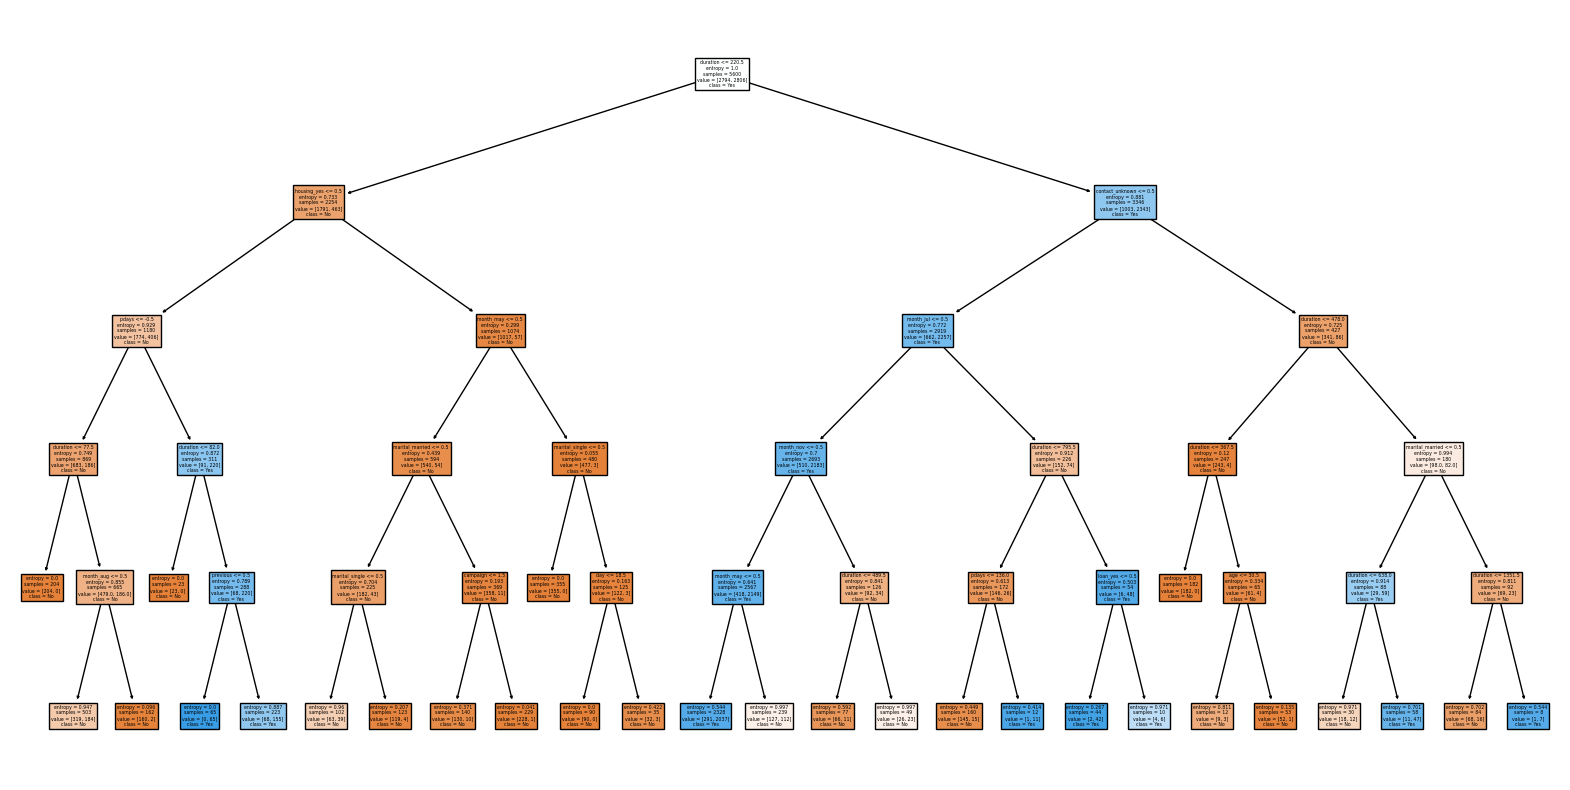

In [54]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()


In [56]:
import joblib
joblib.dump(model, 'decision_tree_bank_model.pkl')

['decision_tree_bank_model.pkl']

## ✅ Conclusion

After applying SMOTE to balance the dataset and training a Decision Tree Classifier, we achieved:

- Accuracy: **85.3%**
- Balanced precision and recall for both classes
- Improved performance on minority class (Yes)

This shows that Decision Trees, combined with data balancing, can effectively predict customer purchase behavior from demographic and behavioral features.
